In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [223]:
#reading the dataset
app_data=pd.read_csv("application_data.csv")
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [224]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [225]:
app_data.describe().T

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

# list of columns

In [226]:
list(app_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [227]:
# Cleaning the missing data
# listing the null values columns having more than 30%
emptycol=app_data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)


64

there are 64 columns having null values

In [228]:
#dropping columns having greater than 30% nullvalues(emptycol)

#Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
app_data.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [229]:
#checking the columns having less  null percentage
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing banks with median value

In [230]:
# Filling missing values with median

values=app_data['AMT_ANNUITY'].median()

app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [231]:
# Searching for the column for null values

app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION


Now, all columns have been with zero null values



In [232]:
# Removing rows having null values greater than or equal to 30%

emptyrow=app_data.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(app_data)].index)
app_data.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))


0


In [233]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=unwanted,axis=1,inplace=True)


There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [234]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 28)

In [235]:
# For Organization column

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)


So, there are 4 rows from Gender column and 55374 rows from Organization type column

In [236]:
# Describing the Gender column to check the number of females and males

app_data['CODE_GENDER'].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [237]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [238]:
# Describing the organization type column

app_data['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [239]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [240]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)
app_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

# Derived Metrics

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [241]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [242]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

In [243]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_app=app_data.loc[app_data["TARGET"]==0]
target1_app=app_data.loc[app_data["TARGET"]==1]

In [244]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_app)/len(target1_app),2)


10.55

the imbalance ratio is 10.55

## Univariate analysis



In [245]:
app_data[["CNT_CHILDREN","DAYS_EMPLOYED","AMT_INCOME_TOTAL"]].describe().T

count           mean            std      min       25%  \
CNT_CHILDREN      252137.0       0.498515       0.763161      0.0       0.0   
DAYS_EMPLOYED     252137.0   -2384.169325    2338.360162 -17912.0   -3175.0   
AMT_INCOME_TOTAL  252137.0  175914.070795  258851.587748  25650.0  112500.0   

                       50%       75%          max  
CNT_CHILDREN           0.0       1.0         19.0  
DAYS_EMPLOYED      -1648.0    -767.0          0.0  
AMT_INCOME_TOTAL  157500.0  211500.0  117000000.0

In [246]:
q1=app_data["CNT_CHILDREN"].quantile(0.99)
q1

3.0

In [247]:
app_data.CNT_CHILDREN.value_counts()

0     161911
1      59698
2      26365
3       3629
4        414
5         81
6         19
7          7
19         2
14         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

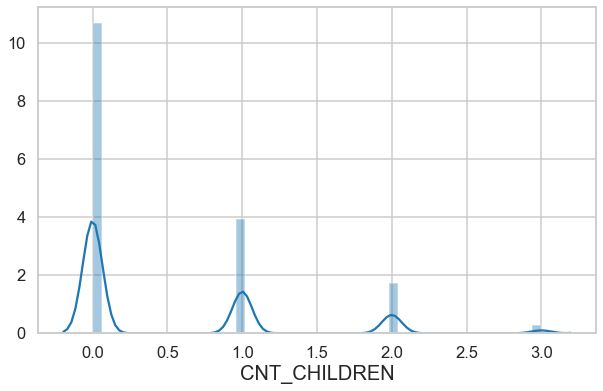

In [248]:
q1=app_data["CNT_CHILDREN"].quantile(0.99)
app_data["CNT_CHILDREN"] =  app_data.CNT_CHILDREN.apply(lambda x: q1 if x>q1 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_1 = sns.distplot(app_data["CNT_CHILDREN"])

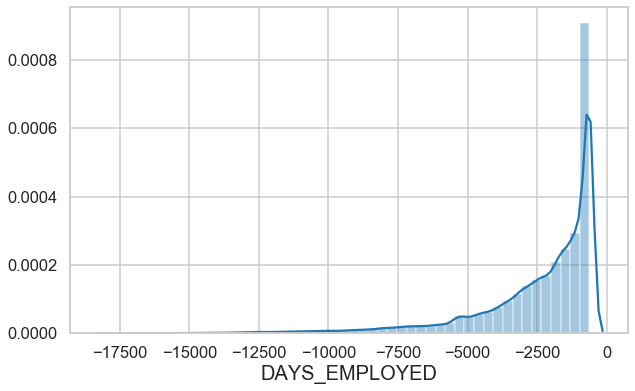

In [249]:
q2=app_data["DAYS_EMPLOYED"].quantile(0.80)
app_data["DAYS_EMPLOYED"] =  app_data.DAYS_EMPLOYED.apply(lambda x: q2 if x>q2 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_2 = sns.distplot(app_data["DAYS_EMPLOYED"])


In [250]:
q3=app_data["AMT_INCOME_TOTAL"].quantile(0.95)
app_data["AMT_INCOME_TOTAL"] =  app_data.AMT_INCOME_TOTAL.apply(lambda x: q3 if x>q3 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_3 = sns.distplot(app_data["AMT_INCOME_TOTAL"])


In [251]:
categorical = ["object"]
Univariate_defaulter_Cat_1_app =target1_app.select_dtypes(include=categorical)
Univariate_defaulter_Cat_1_app

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
26             Cash loans           F            N               Y   
40             Cash loans           M            N               Y   
42             Cash loans           F            N               N   
94             Cash loans           M            Y               Y   
...                   ...         ...          ...             ...   
307448         Cash loans           M            N               N   
307475         Cash loans           F            N               N   
307481         Cash loans           M            N               Y   
307489         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
26                   Working  Secondary / secondary special   
40      Commercial associate  Secondary / secondary special   
42                   Working  Secondary / secondary special   
94      Commercial associate              Incomplete higher   
...                      ...                            ...   
307448               Working  Secondary / secondary special   
307475               Working               Higher education   
307481               Working  Secondary / secondary special   
307489  Commercial associate  Secondary / secondary special   
307509  Commercial associate  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
0       Single / not married  House / apartment                  WEDNESDAY   
26                     Widow  House / apartment                     MONDAY   
40                   Married  House / apartment                    TUESDAY   
42            Civil marriage  House / apartment                   THURSDAY   
94      Single / not married       With parents                     SUNDAY   
...                      ...                ...                        ...   
307448               Married  House / apartment                     MONDAY   
307475        Civil marriage  House / apartment                   THURSDAY   
307481               Married  House / apartment                     FRIDAY   
307489        Civil marriage  House / apartment                     FRIDAY   
307509               Married  House / apartment                  WEDNESDAY   

             ORGANIZATION_TYPE  
0       Business Entity Type 3  
26      Business Entity Type 3  
40      Business Entity Type 3  
42               Self-employed  
94            Industry: type 4  
...                        ...  
307448  Business Entity Type 3  
307475            Construction  
307481  Business Entity Type 3  
307489  Business Entity Type 3  
307509  Business Entity Type 1  

[21835 rows x 10 columns]

In [252]:
#graph to plot Males and femals in the entire polulation
Gender_vs_Total = sns.countplot("CODE_GENDER",data =app_data)


In [253]:
#find the percentage of males and females in the defaulter list
test_app1=round((Univariate_defaulter_Cat_1_app["CODE_GENDER"].value_counts()/app_data["CODE_GENDER"].value_counts())*100,2)
test_app1= pd.DataFrame(test_app1)
test_app1.reset_index(level=0, inplace=True)
test_app1.rename(columns=  {"index": "CODE_GENDER", 
                     "CODE_GENDER":"Default_Percentage"}, 
                                 inplace = True) 
test_app1

CODE_GENDER  Default_Percentage
0           F                7.58
1           M               10.44

In [254]:
#plot to show the number male and female clients vs. Target variable. Here, Target =1
Gender_vs_Target= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=test_app1)


So, from above plots and data we can cleary see that the Female clients are a better TARGET as compared to the Male clients. Observing the percent of defaulted credits, male client have a higher chance of not returning their loans [10.14%], compared to the female clients [7%].

### Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

In [257]:
# Count plotting in logarithmic scale

def uniplot(app_data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(app_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = app_data, x= col, order=app_data[col].value_counts().index,hue = hue,palette='mako') 
    
    
    plt.show()
    

In [258]:
# PLotting for income range

uniplot(target0_app,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

1.Female counts are higher than male in the range 100000 to 200000.

2.Income range from 100000 to 200000 is having more number of credits.

3.Very less count for income range 400000 above and 50000 below.

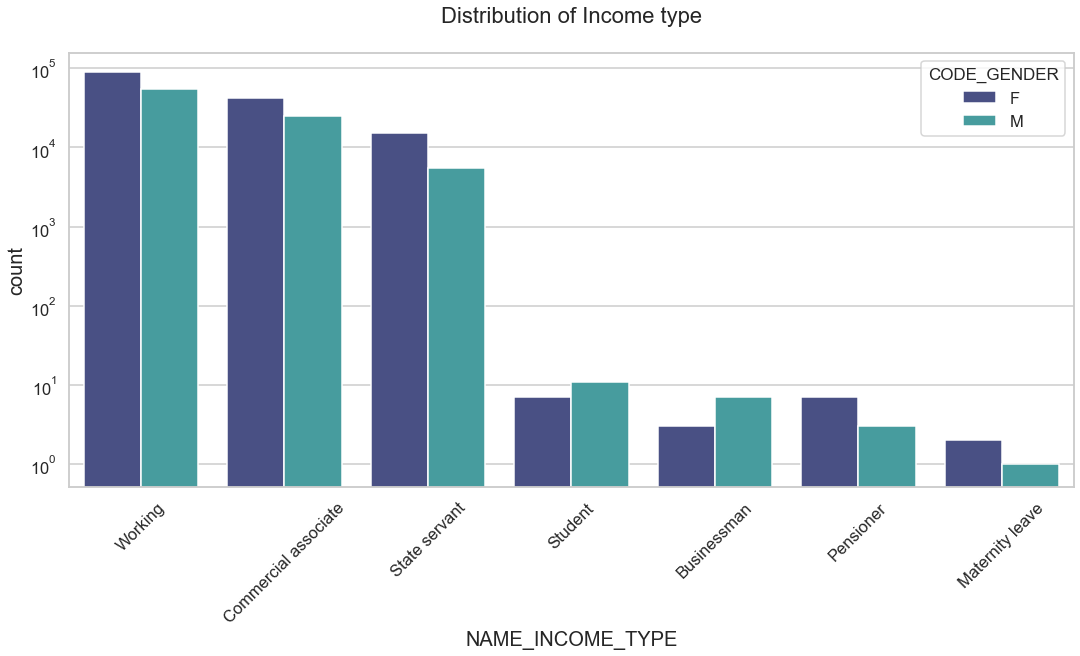

In [259]:
# Plotting for Income type

uniplot(target0_app,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Points to be concluded from the above graph.

1.For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.

2.For this Females are having more number of credits than male.

3.Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

In [260]:
# Plotting for Contract type

uniplot(target0_app,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


Points to be concluded from the above graph.

1.For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

2.For this also Female is leading for applying credits.

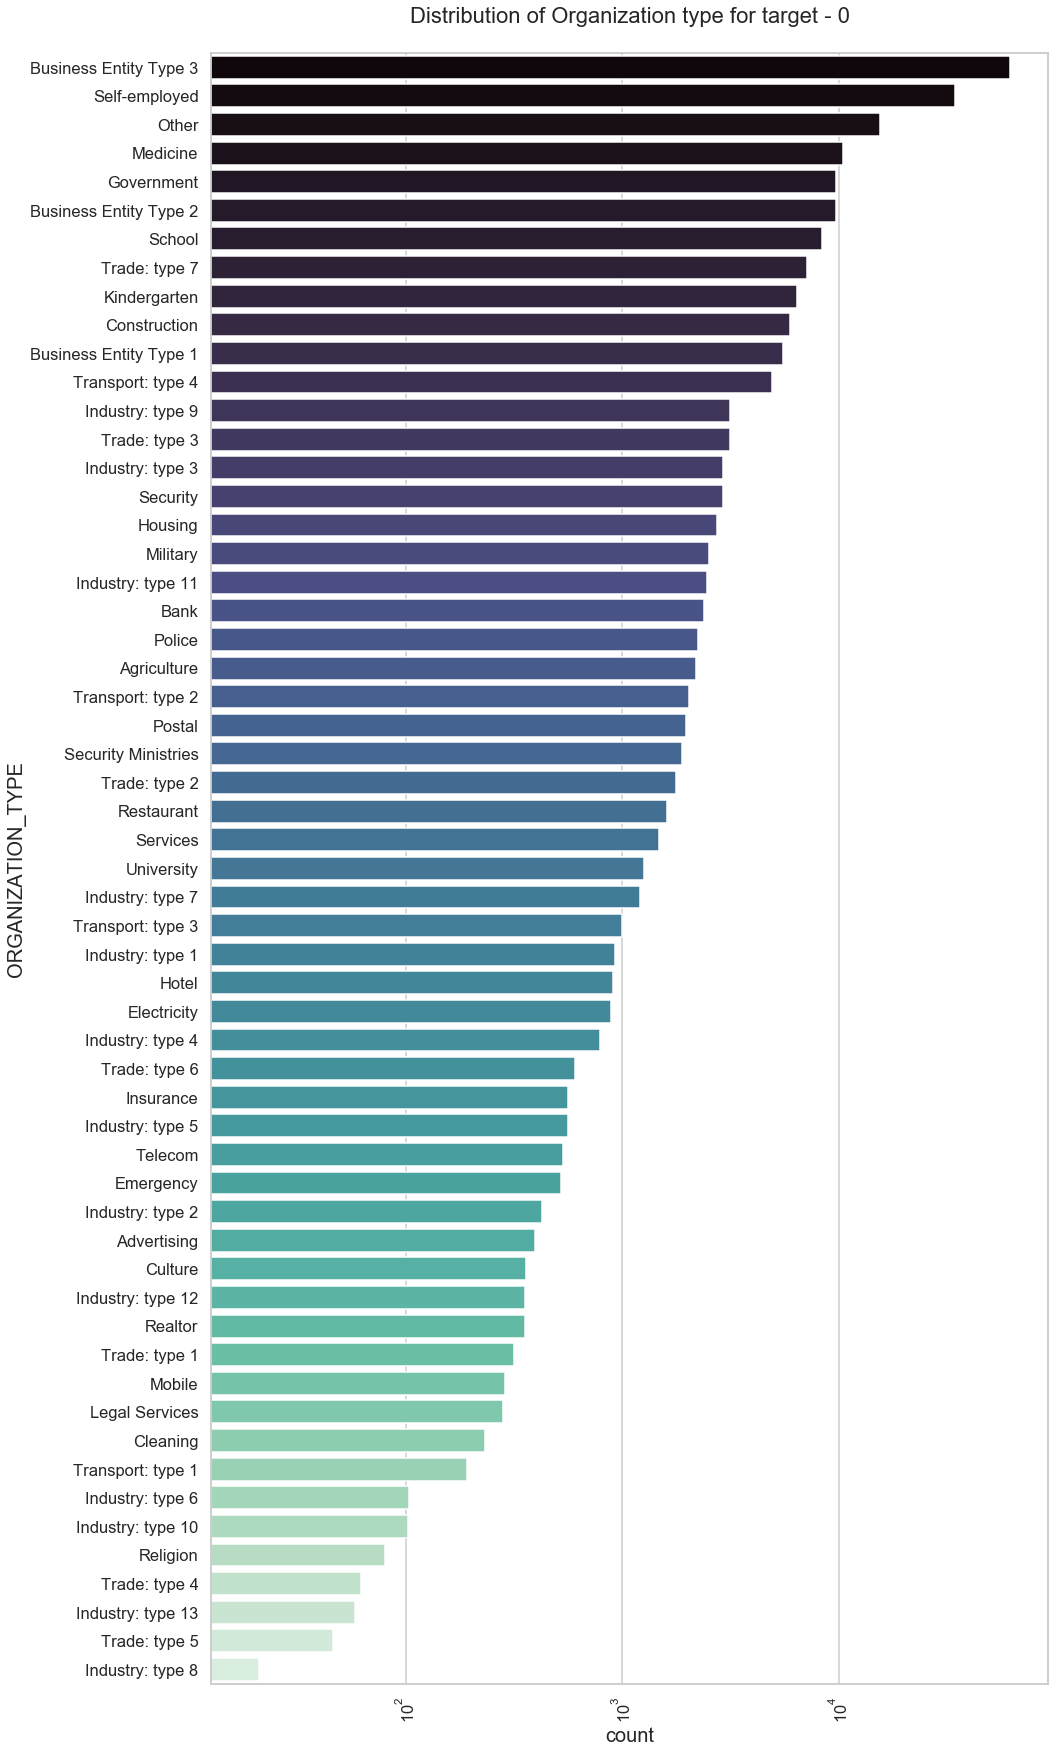

In [261]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_app,y='ORGANIZATION_TYPE',order=target0_app['ORGANIZATION_TYPE'].value_counts().index,palette='mako')
plt.show()

Points to be concluded from the above graph.

1.Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.

2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

### Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)



In [262]:
# Count plotting in logarithmic scale

def uniplot1(app_data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(app_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = app_data, x= col, order=app_data[col].value_counts().index,hue = hue,palette='cool') 
    
    
    plt.show()

In [263]:
# PLotting for income range

uniplot1(target1_app,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

1.Male counts are higher than female.

2.Income range from 100000 to 200000 is having more number of credits.

3.This graph show that males are more than female in having credits for that range.

4.Very less count for income range 400000 and above.

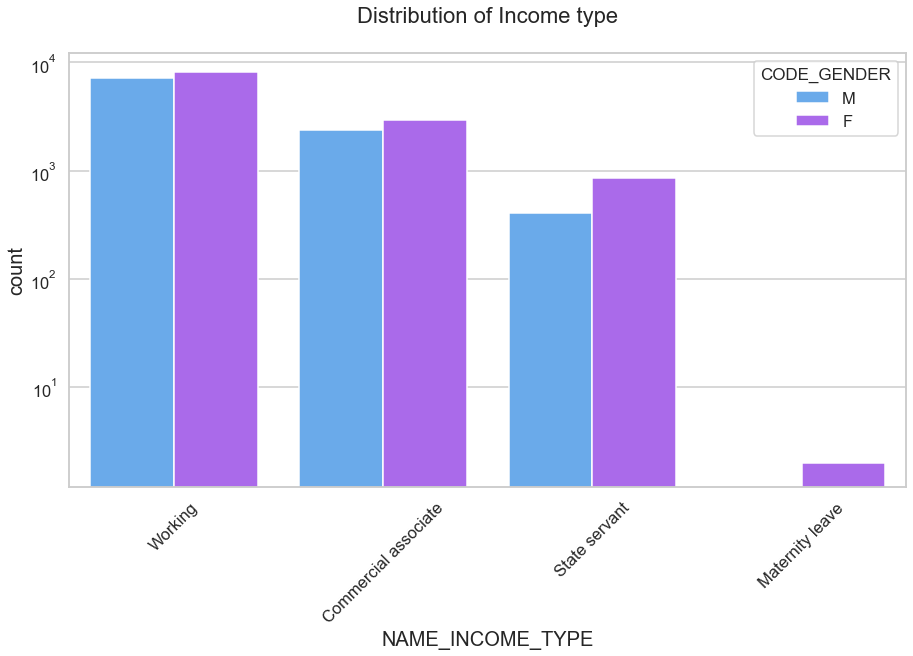

In [264]:
# Plotting for Income type

uniplot1(target1_app,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Points to be concluded from the above graph.

1.For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.

2.For this Females are having more number of credits than male.

3.Less number of credits for income type ‘Maternity leave’.

4.For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

In [265]:
# Plotting for Contract type

uniplot1(target1_app,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1.For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

2.For this also Female is leading for applying credits.

3.For type 1 : there is only Female Revolving loans.

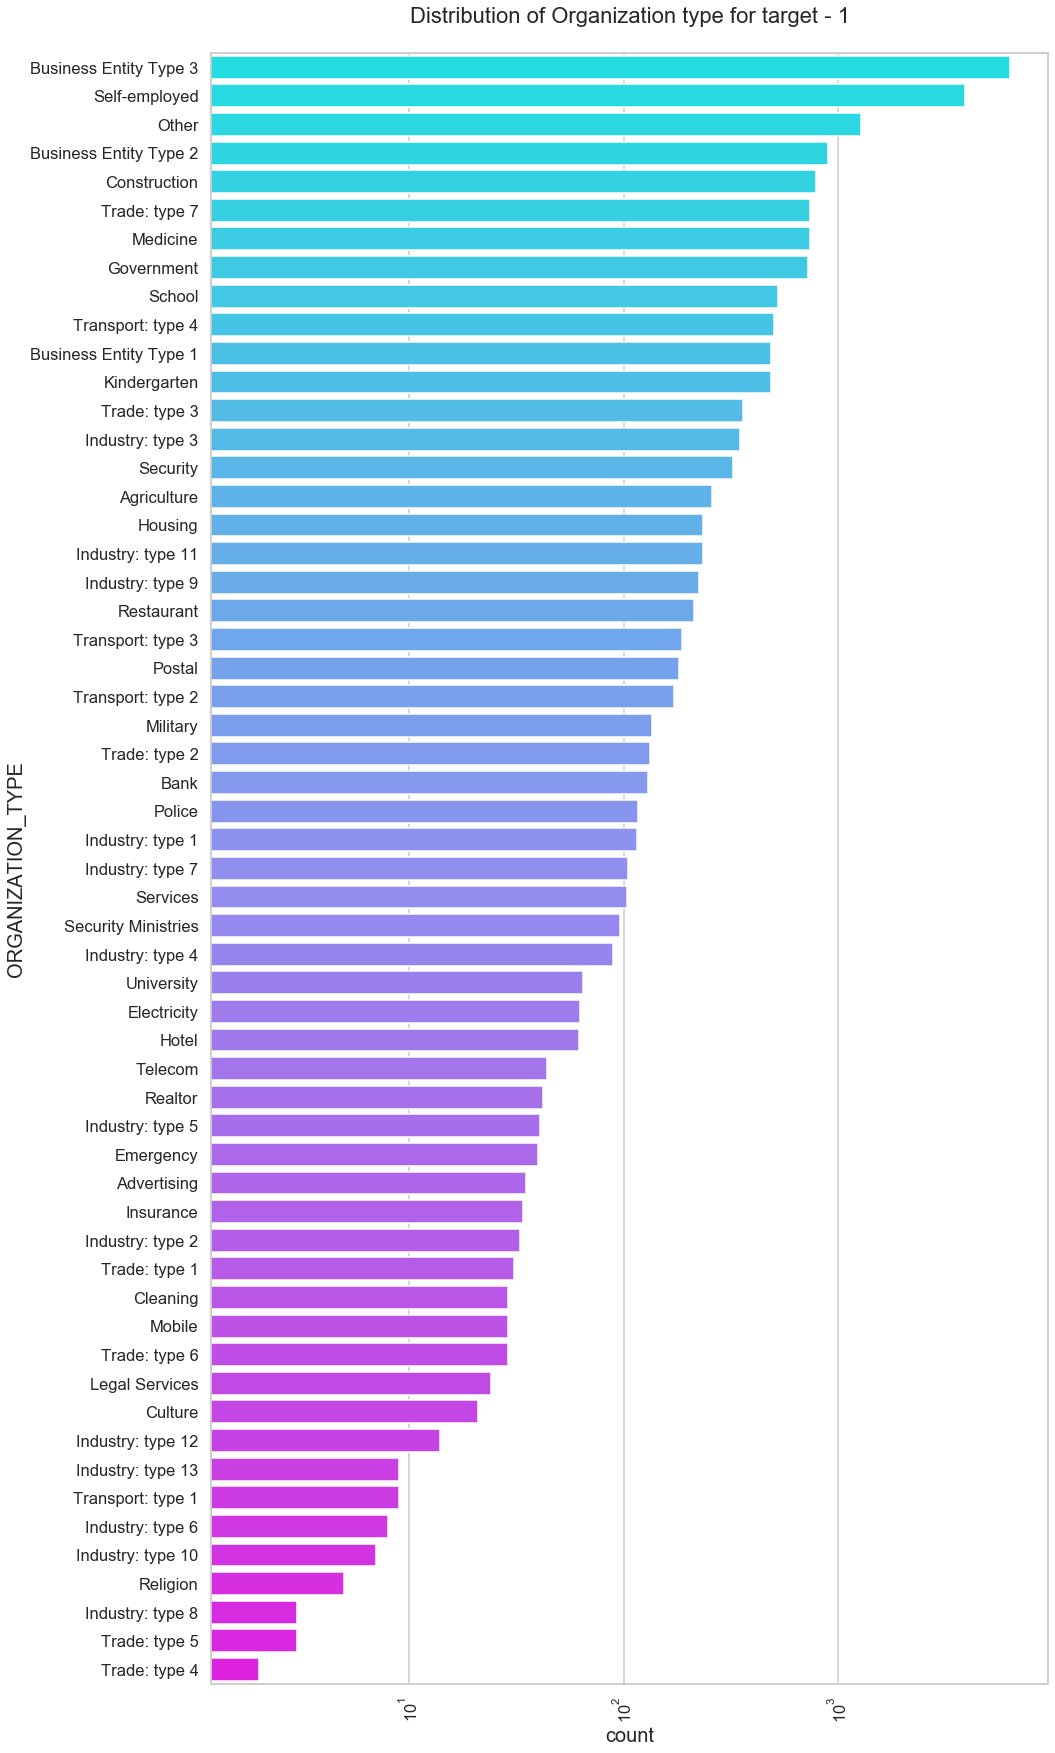

In [266]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_app,y='ORGANIZATION_TYPE',order=target1_app['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

Points to be concluded from the above graph.

1.Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘construction’ and ‘Trade: type:7’.

2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

3.there is some variation in the target0 and target 1distribution based on orgnanization type

In [267]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_app.iloc[0:,2:]
target1_corr=target1_app.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [268]:
# Correlation for target 0

target0


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                   -0.010795                   -0.030579   
AMT_INCOME_TOTAL                0.472204                    0.110074   
AMT_CREDIT                      0.826689                    0.060706   
AMT_ANNUITY                     1.000000                    0.064328   
REGION_POPULATION_RELATIVE      0.064328                    1.000000   
DAYS_BIRTH                     -0.100287                   -0.041663   
DAYS_EMPLOYED                  -0.074643                    0.000900   
DAYS_REGISTRATION               0.010712                   -0.042400   
DAYS_ID_PUBLISH                -0.027354                   -0.010299   
HOUR_APPR_PROCESS_START         0.032953                    0.133213   
REG_REGION_NOT_LIVE_REGION      0.033435                   -0.025292   
REG_REGION_NOT_WORK_REGION      0.070841                    0.032446   
LIVE_REGION_NOT_WORK_REGION     0.069051                    0.056814   
REG_CITY_NOT_LIVE_CITY         -0.019954                   -0.049779   
REG_CITY_NOT_WORK_CITY         -0.024085                   -0.034808   
LIVE_CITY_NOT_WORK_CITY        -0.008087                   -0.007332   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.266534       0.030948           0.155518   
AMT_INCOME_TOTAL              -0.054666      -0.060868           0.040559   
AMT_CREDIT                    -0.169030      -0.104251          -0.015318   
AMT_ANNUITY                   -0.100287      -0.074643           0.010712   
REGION_POPULATION_RELATIVE    -0.041663       0.000900          -0.042400   
DAYS_BIRTH                     1.000000       0.307787           0.265449   
DAYS_EMPLOYED                  0.307787       1.000000           0.126708   
DAYS_REGISTRATION              0.265449       0.126708           1.000000   
DAYS_ID_PUBLISH                0.083331       0.106823           0.036788   
HOUR_APPR_PROCESS_START        0.051299       0.026444          -0.029553   
REG_REGION_NOT_LIVE_REGION     0.058627       0.065435           0.017715   
REG_REGION_NOT_WORK_REGION     0.038104       0.086966           0.015092   
LIVE_REGION_NOT_WORK_REGION    0.012789       0.063533           0.007716   
REG_CITY_NOT_LIVE_CITY         0.167477       0.118224           0.038064   
REG_CITY_NOT_WORK_CITY         0.111539       0.125954           0.047339   
LIVE_CITY_NOT_WORK_CITY        0.029007       0.069567           0.027231   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.119164                -0.030162   
AMT_INCOME_TOTAL                   -0.036702                 0.073503   

In [269]:
# Correlation for target 0

target1


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.015133                   -0.029682   
AMT_INCOME_TOTAL                0.428947                    0.058005   
AMT_CREDIT                      0.812093                    0.043545   
AMT_ANNUITY                     1.000000                    0.028666   
REGION_POPULATION_RELATIVE      0.028666                    1.000000   
DAYS_BIRTH                     -0.100200                   -0.044444   
DAYS_EMPLOYED                  -0.060193                   -0.015246   
DAYS_REGISTRATION               0.019762                   -0.033490   
DAYS_ID_PUBLISH                -0.044128                   -0.017779   
HOUR_APPR_PROCESS_START         0.021129                    0.109400   
REG_REGION_NOT_LIVE_REGION      0.029646                   -0.032702   
REG_REGION_NOT_WORK_REGION      0.060363                   -0.008160   
LIVE_REGION_NOT_WORK_REGION     0.059724                    0.012602   
REG_CITY_NOT_LIVE_CITY         -0.011744                   -0.057239   
REG_CITY_NOT_WORK_CITY         -0.015938                   -0.044761   
LIVE_CITY_NOT_WORK_CITY        -0.003012                   -0.014753   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.175025       0.006823           0.110854   
AMT_INCOME_TOTAL              -0.103026      -0.053798           0.011378   
AMT_CREDIT                    -0.200718      -0.107605          -0.021973   
AMT_ANNUITY                   -0.100200      -0.060193           0.019762   
REGION_POPULATION_RELATIVE    -0.044444      -0.015246          -0.033490   
DAYS_BIRTH                     1.000000       0.256870           0.192350   
DAYS_EMPLOYED                  0.256870       1.000000           0.086286   
DAYS_REGISTRATION              0.192350       0.086286           1.000000   
DAYS_ID_PUBLISH                0.146246       0.104244           0.061563   
HOUR_APPR_PROCESS_START        0.041994       0.010328          -0.044753   
REG_REGION_NOT_LIVE_REGION     0.046320       0.069566           0.006362   
REG_REGION_NOT_WORK_REGION     0.022208       0.082264           0.000896   
LIVE_REGION_NOT_WORK_REGION    0.000356       0.056081          -0.001416   
REG_CITY_NOT_LIVE_CITY         0.145884       0.118869           0.015831   
REG_CITY_NOT_WORK_CITY         0.096181       0.139863           0.039204   
LIVE_CITY_NOT_WORK_CITY        0.009633       0.069316           0.026105   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.091042                -0.040338   
AMT_INCOME_TOTAL                   -0.051113                 0.078779   

In [270]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

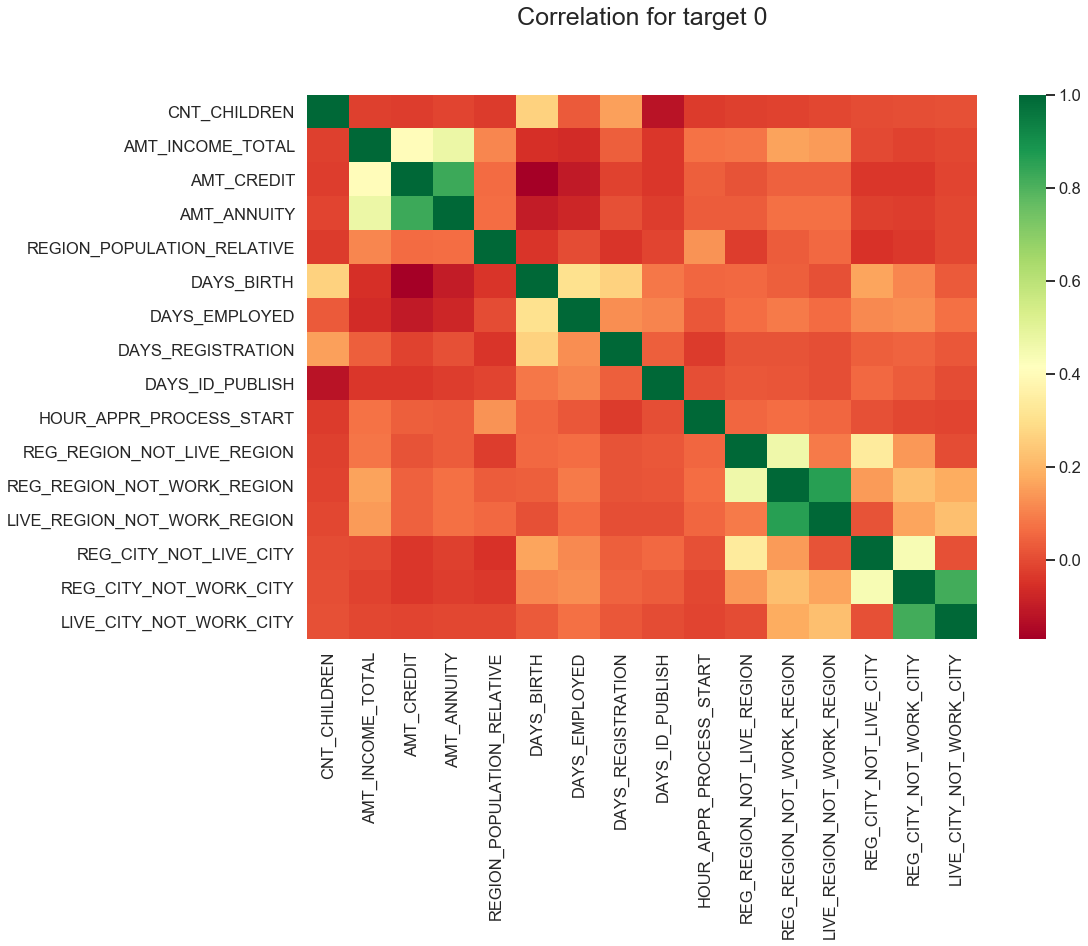

In [271]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

2.Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.

3.Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

4.less children client have in densely populated area.

5.Credit amount is higher to densely populated area.

6.The income is also higher in densely populated area.

In [272]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

few observations are :

1.The client's permanent address does not match contact address are having less children and vice-versa

2.the client's permanent address does not match work address are having less children and vice-versa

3.credit amount is propotional to the income 

#### Univariate analysis for variables

In [273]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical_0(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target0_app, x=col,orient='v')
    plt.show()

#### For Target 0 - Finding any outliers

In [274]:
#Distribution of income amount

univariate_numerical_0(data=target0_app,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1.Huge number of outliers are noticed in income amount.

2.Almost the 1st and 3rd  quartiles are very slim and have very small percent of people

3.And a greater number is found in the between the min and 1st quartile

In [275]:
# Disrtibution of credit amount

univariate_numerical_0(data=target0_app,col='AMT_CREDIT',title='Distribution of credit amount')


Few points can be concluded from the graph above.

1.Very few outliers are noticed in credit amount.

2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

3.A large number people have a credit in the range of the minimum and 1st quartile 

4.This shows that a larger part of the credit is between 50 thousands  and 5lakhs

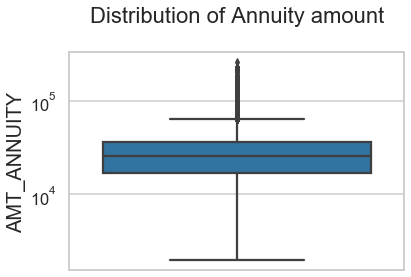

In [276]:
# Distribution of anuuity amount

univariate_numerical_0(data=target0_app,col='AMT_ANNUITY',title='Distribution of Annuity amount')


Few points can be concluded from the graph above.

1.A good number of outliers are noticed in annuity amount.

2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

3.Very low people are in between the 3rd and max quartile

#### For Target 1 - Finding any outliers



In [282]:
#finding the outliers of the TARGET = 1
def univariate_numerical_1(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_app, x=col,orient='v')
    
    plt.show()

In [283]:
# Distribution of income amount

univariate_numerical_1(data=target1_app,col='AMT_INCOME_TOTAL',title='Distribution of income amount')


Few points can be concluded from the graph above.

1.Few  outliers are in income amount ,and lies too distant 

2.The third quartiles is very low for income amount.

3.Most of the clients of income are present in first quartile.


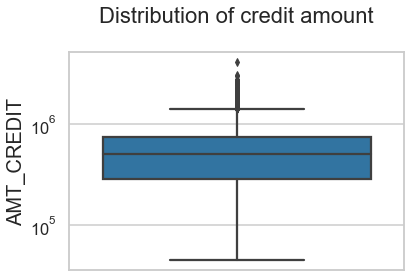

In [284]:
# Distribution of credit amount

univariate_numerical_1(data=target1_app,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1.Very low number of  outliers are noticed in credit amount.

2.The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

3.3rd quartile is too small



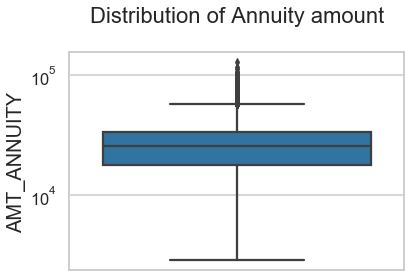

In [285]:
# Distribution of Annuity amount

univariate_numerical_1(data=target1_app,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1.Outliers lie just above the max quartile in annuity amount.

2.The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.


#### Bivariate analysis for numerical variables

##### For Target 0

In [286]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Few points can be concluded from the graph.

1.'civil marriage', 'marriage'  'separated'  are having higher amount of credit than others.

2.Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers and a larger 3rd quartile

3.Credit amount is higher as the education status increases 

4.Widows with very low education status  has a very low credit amount, and the credit amount is comparatively low for higher education status with others


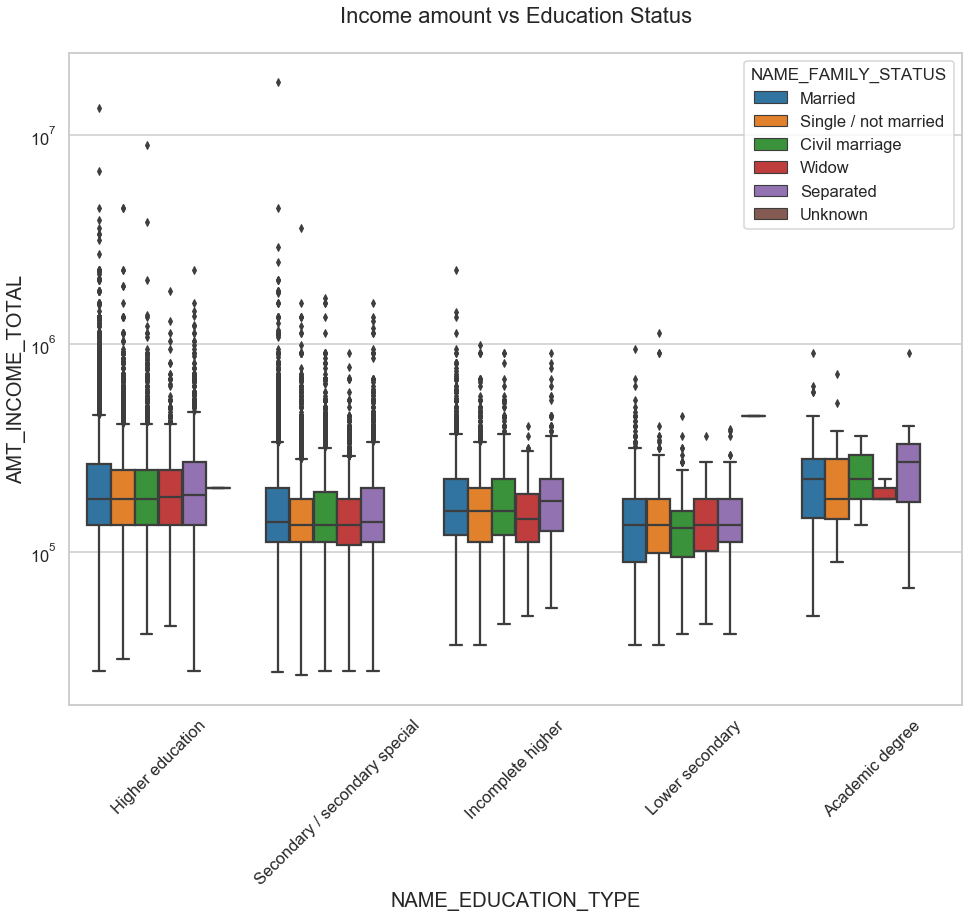

In [287]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_app, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Few points can be concluded from the graph.

1.For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.

2.Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.

3.Lower secondary of civil marriage family status are have less income amount than others.



##### For Target 1



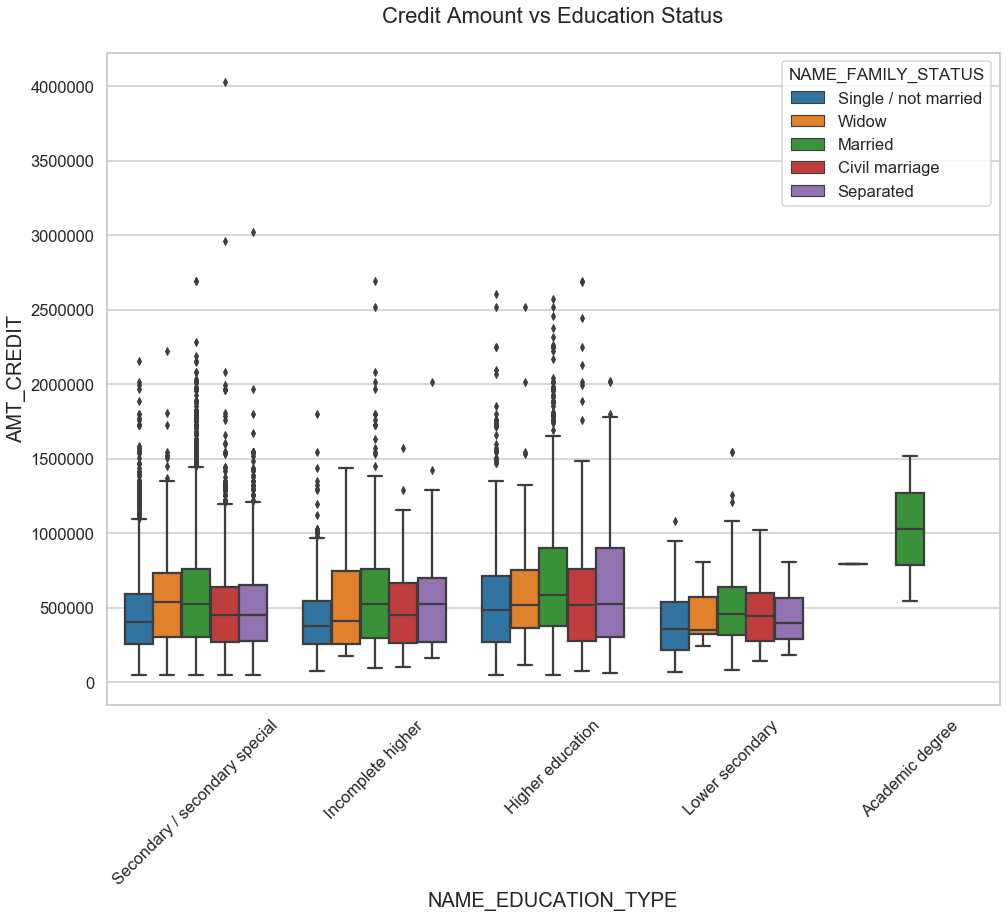

In [288]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()


inference:
Few points can be concluded from the graph.

1.from Target 1, we can say that Family status of 'civil marriage', 'married' and ‘widows of any education status are having higher number of credits than others

2.Most of the outliers are from Education type 'Higher education' and 'Secondary’.

3.Very low people from academic degree are in target1 except’ married ‘
Civil marriage people have a 2nd higher rate


In [289]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_app, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

INFERENCE:
Few points can be concluded from the graph.

1.From boxplot for Education status 'Higher education' the income amount is mostly equal with family status.

2.Secondary education status has the most outliers 

3.Lower secondary are have less income amount than others.

4.Higher education and secondary education has a exact same median


# ANALYSIS ON PREVIOUS APPLICATION DATA

In [290]:
#reading the data
pre_data=pd.read_csv('previous_application.csv')
pre_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                Connectivity         12.0            middle   
1                         XNA         36.0        low_action   
2                         XNA         12.0              high   
3                         XNA         12.0            middle   
4                         XNA         24.0              high   
...                       ...          ...               ...   
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS mobile with interest            365243.0          -42.0   
1                   Cash X-Sell: low            365243.0         -134.0   
2                  Cash X-Sell: high            365243.0         -271.0   
3                Cash X-Sell: middle            365243.0         -482.0   
4                  Cash Street: high                 NaN            NaN   
...                              ...                 ...            ...   
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest      

In [291]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=pre_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [292]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
pre_data.drop(labels=emptycol1,axis=1,inplace=True)

pre_data.shape


(1670214, 22)

In [293]:
# Removing the column values of 'XNA' and 'XAP'

pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_data=pre_data.drop(pre_data[pre_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre_data.shape

(69635, 22)

In [294]:

# Now merging the Application dataset with previous appliaction dataset

new_data=pd.merge(left=app_data,right=pre_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [295]:
new_data.describe().T

count          mean            std  \
SK_ID_CURR                   51420.0  2.783539e+05  103340.154310   
TARGET                       51420.0  1.362505e-01       0.343058   
CNT_CHILDREN                 51420.0  4.666083e-01       0.744071   
AMT_INCOME_TOTAL             51420.0  1.804733e+05   76560.686264   
AMT_CREDIT_                  51420.0  5.630848e+05  365185.890327   
AMT_ANNUITY                  51420.0  2.727953e+04   13590.160078   
REGION_POPULATION_RELATIVE   51420.0  2.095497e-02       0.013324   
DAYS_BIRTH                   51420.0 -1.506606e+04    3614.850920   
DAYS_EMPLOYED                51420.0 -2.337904e+03    2196.056262   
DAYS_REGISTRATION            51420.0 -4.393208e+03    3266.743634   
DAYS_ID_PUBLISH              51420.0 -2.810108e+03    1496.958587   
HOUR_APPR_PROCESS_START_     51420.0  1.204520e+01       3.283540   
REG_REGION_NOT_LIVE_REGION   51420.0  1.444963e-02       0.119336   
REG_REGION_NOT_WORK_REGION   51420.0  5.563983e-02       0.229227   
LIVE_REGION_NOT_WORK_REGION  51420.0  4.449630e-02       0.206197   
REG_CITY_NOT_LIVE_CITY       51420.0  8.864255e-02       0.284230   
REG_CITY_NOT_WORK_CITY       51420.0  2.835278e-01       0.450715   
LIVE_CITY_NOT_WORK_CITY      51420.0  2.198172e-01       0.414127   
SK_ID_PREV                   51420.0  1.935775e+06  530345.418012   
AMT_APPLICATION              51420.0  4.741145e+05  509766.795271   
AMT_CREDITx                  51420.0  5.333814e+05  555667.116361   
HOUR_APPR_PROCESS_STARTx     51420.0  1.226381e+01       3.238890   
NFLAG_LAST_APPL_IN_DAY       51420.0  9.991443e-01       0.029240   
DAYS_DECISION                51420.0 -6.203944e+02     513.786801   
SELLERPLACE_AREA             51420.0  9.522618e+00     137.719879   

                                      min           25%           50%  \
SK_ID_CURR                   1.000340e+05  1.886278e+05  2.793700e+05   
TARGET                       0.000000e+00  0.000000e+00  0.000000e+00   
CNT_CHILDREN                 0.000000e+00  0.000000e+00  0.000000e+00   
AMT_INCOME_TOTAL             2.700000e+04  1.215000e+05  1.620000e+05   
AMT_CREDIT_                  4.500000e+04  2.749410e+05  4.873815e+05   
AMT_ANNUITY                  2.052000e+03  1.741050e+04  2.552400e+04   
REGION_POPULATION_RELATIVE   5.330000e-04  1.014700e-02  1.910100e-02   
DAYS_BIRTH                  -2.515300e+04 -1.787900e+04 -1.479300e+04   
DAYS_EMPLOYED               -1.717000e+04 -3.003000e+03 -1.589000e+03   
DAYS_REGISTRATION           -1.948800e+04 -6.566500e+03 -3.974000e+03   
DAYS_ID_PUBLISH             -6.232000e+03 -4.151000e+03 -2.899000e+03   
HOUR_APPR_PROCESS_START_     0.000000e+00  1.000000e+01  1.200000e+01   
REG_REGION_NOT_LIVE_REGION   0.000000e+00  0.000000e+00  0.000000e+00   
REG_REGION_NOT_WORK_REGION   0.000000e+00  0.000000e+00  0.000000e+00   
LIVE_REGION_NOT_WORK_REGION  0.000000e+00  0.000000e+00  0.000000e+00   
REG_CITY_NOT_LIVE_CITY       0.000000e+00  0.000000e+00  0.000000e+00   
REG_CITY_NOT_WORK_CITY       0.000000e+00  0.000000e+00  0.000000e+00   
LIVE_CITY_NOT_WORK_CITY      0.000000e+00  0.000000e+00  0.000000e+00   
SK_ID_PREV                   1.000125e+06  1.481523e+06  1.942873e+06   
AMT_APPLICATION              0.000000e+00  1.350000e+05  2.700000e+05   
AMT_CREDITx                  0.000000e+00  1.626975e+05  3.320460e+05   
HOUR_APPR_PROCESS_STARTx     0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY       0.000000e+00  1.000000e+00  1.000000e+00   
DAYS_DECISION               -2.406000e+03 -6.780000e+02 -4.870000e+02   
SELLERPLACE_AREA            -1.000000e+00 -1.000000e+00 -1.000000e+00   

                                      75%           max  
SK_ID_CURR                   3.685220e+05  4.562550e+05  
TARGET                       0.000000e+00  1.000000e+00  
CNT_CHILDREN                 1.000000e+00  3.000000e+00  
AMT_INCOME_TOTAL             2.250000e+05  3.553344e+05  
AMT_CREDIT_                  7.551900e+05  3.15

In [296]:
# Renaming the column names after merging

new_data1 = new_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [297]:
# Removing unwanted columns for analysis

new_data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Performing univariate analysis

In [298]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='winter')


inference:

1.Most rejection of loans came from purpose 'repairs'.

2.For education purposes we have equal number of approves and rejection

3.Paying other loans and buying a new car is having significant higher rejection than approves.

In [299]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='mako')


Few points we can conclude from abpve plot:

1.Loan purposes with 'Repairs' are facing more difficulites in payment on time.

2.There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.


#### Performing bivariate analysis

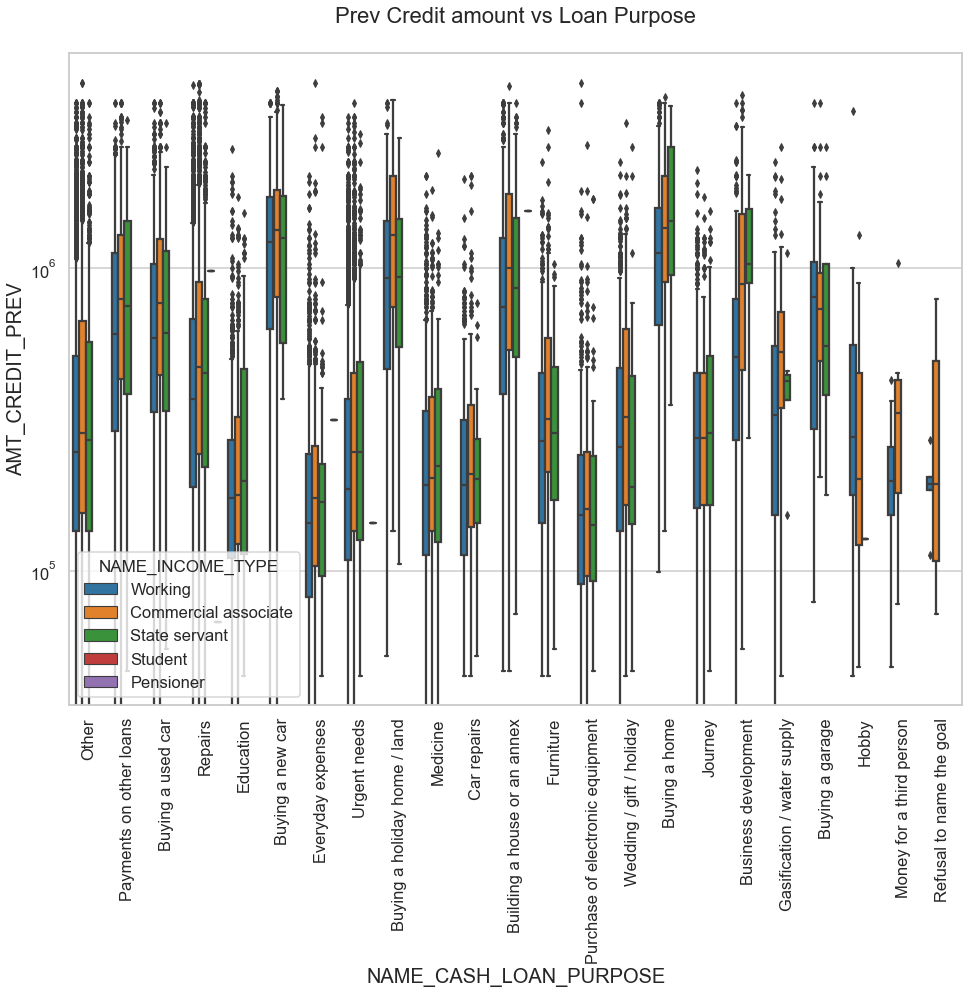

In [300]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_data1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


From the above we can conclude some points-

1.The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

2.Income type of state servants have a significant amount of credit applied

3.Money for third person or a Hobby is having less credits applied for.

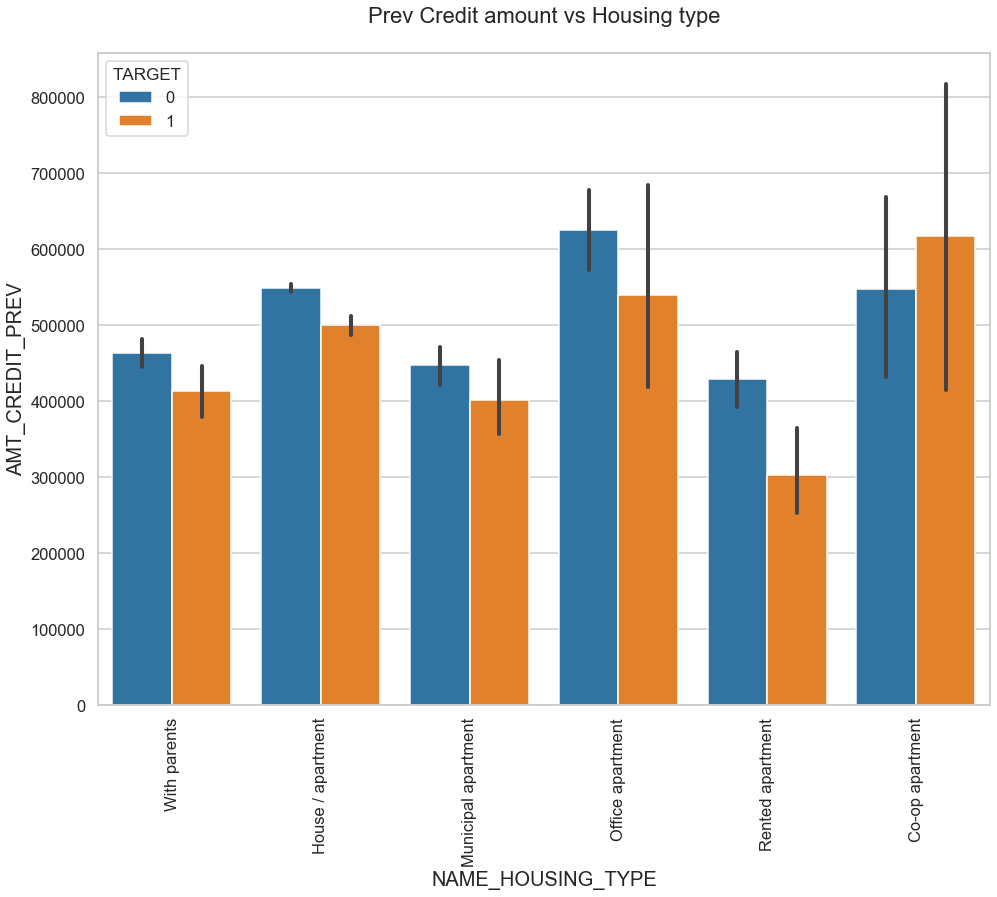

In [301]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_data1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()



Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.